In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from sklearn.utils import shuffle
from skimage.transform import resize

In [13]:
cloudy=glob.glob(r"C:/Users/hp/Desktop/edure/projects/Deep Learning/Capstone Project/Satelite Image Classification/data/cloudy/*.jpg")
desert=glob.glob(r"C:/Users/hp/Desktop/edure/projects/Deep Learning/Capstone Project/Satelite Image Classification/data/desert/*.jpg")
green_area=glob.glob(r"C:\Users\hp\Desktop\edure\projects\Deep Learning\Capstone Project\Satelite Image Classification\data\green_area\*.jpg")
water=glob.glob(r"C:\Users\hp\Desktop\edure\projects\Deep Learning\Capstone Project\Satelite Image Classification\data\water\*.jpg")

# Check the Number of images of each category


In [15]:
print(f"number of images of cloudy{len(cloudy)}\nnumber of images of desert{len(desert)}\nnumber of images of green_area{len(green_area)}\nnumber of images of water{len(water)}")

number of images of cloudy1500
number of images of desert1131
number of images of green_area1500
number of images of water1500


# Read image data from all files and store it in a variable, Store the label as well

In [16]:
image = []
labels = []

for i in cloudy:
    img1 = plt.imread(i)
    image.append(img1)
    labels.append(0)

for i in desert:
    img2 = plt.imread(i)
    image.append(img2)
    labels.append(1)

for i in green_area:
    img3 = plt.imread(i)
    image.append(img3)
    labels.append(2)

for i in water:
    img4 = plt.imread(i)
    image.append(img4)
    labels.append(3)

# Plot some images

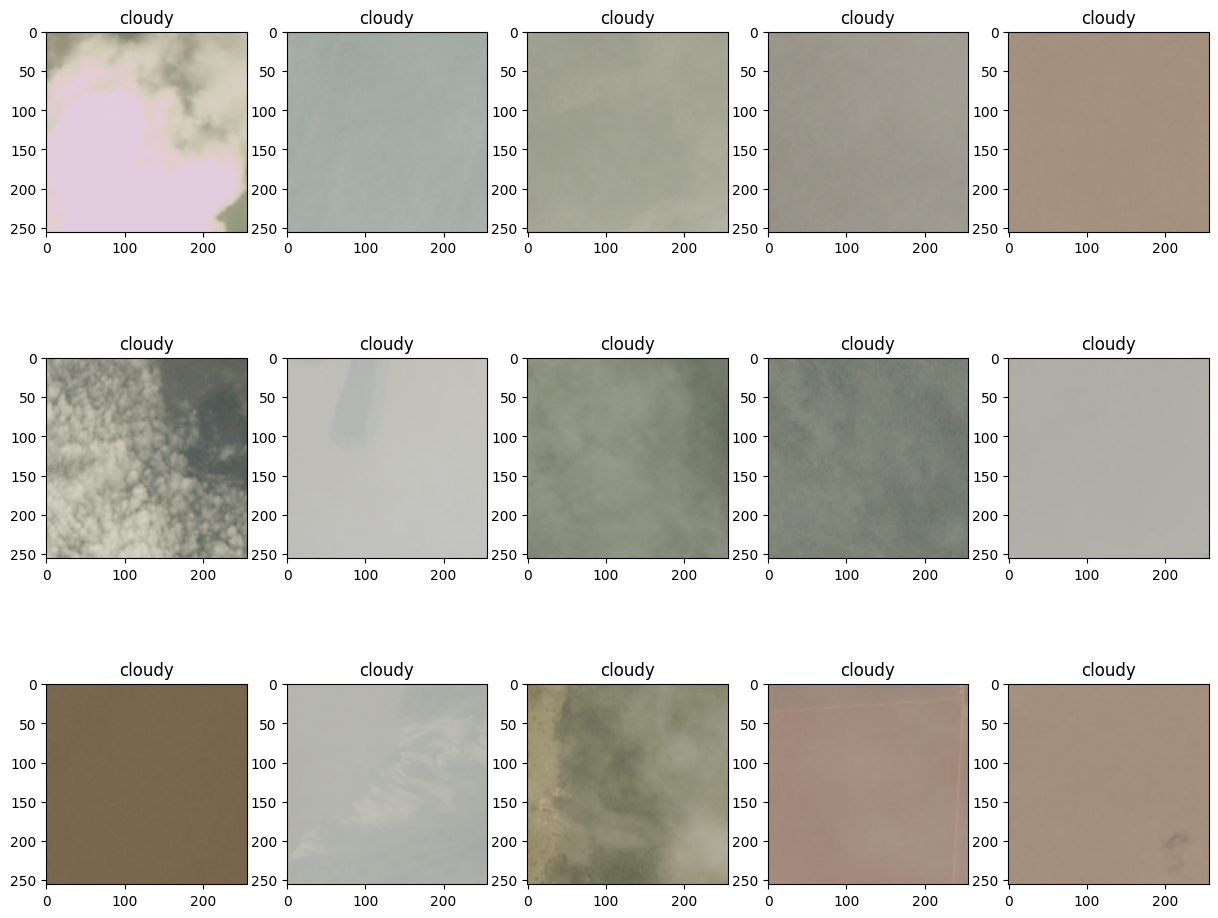

In [17]:
plt.figure(figsize = (15,12))
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(image[i])
    if labels[i] == 0:
        plt.title("cloudy")
    elif labels[i] == 1:
        plt.title("desert")
    elif labels[i] == 2:
        plt.title("green_area")
    elif labels[i] == 3:
        plt.title("water")

# Shuffle the images and labels

In [18]:
image, labels = shuffle(image,labels)

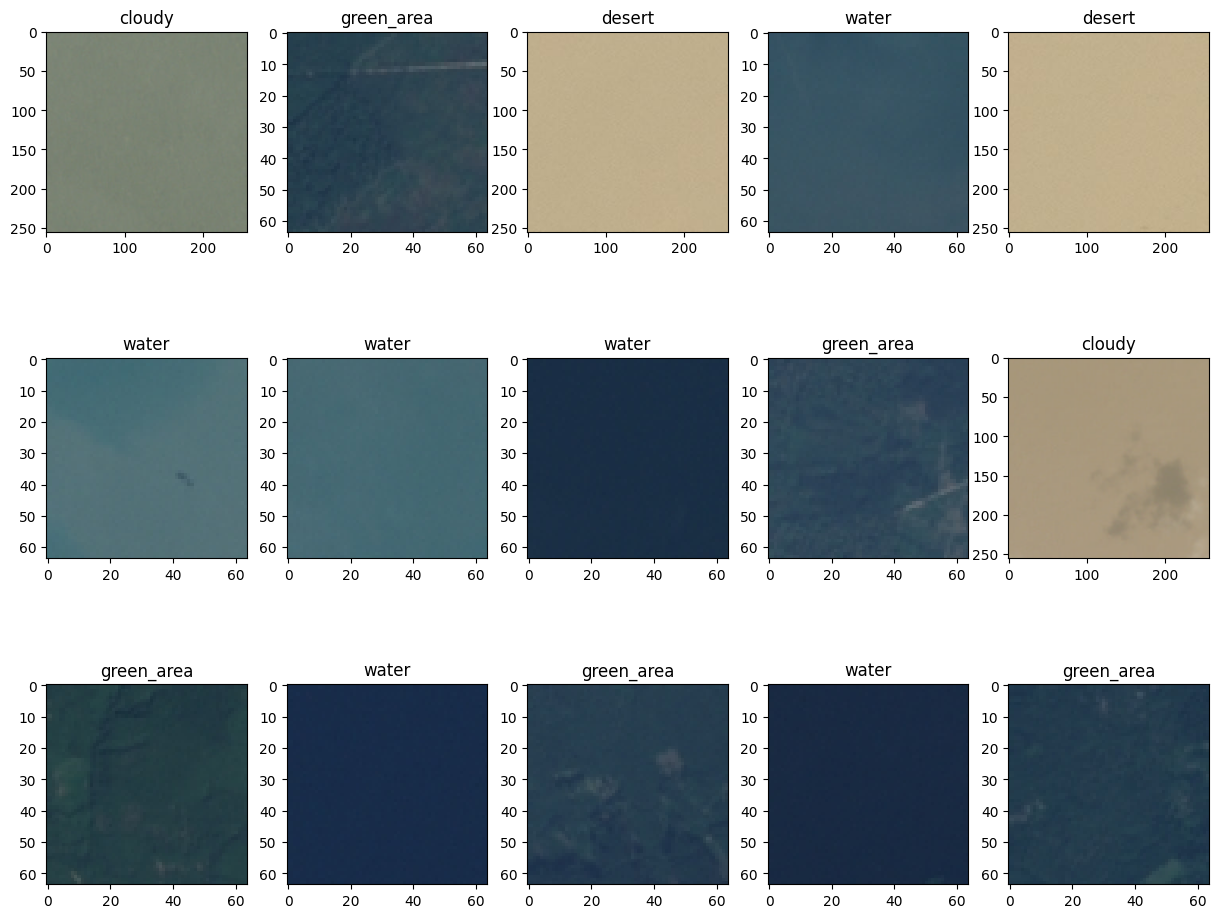

In [19]:

plt.figure(figsize = (15,12))
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(image[i])
    if labels[i] == 0:
        plt.title("cloudy")
    elif labels[i] == 1:
        plt.title("desert")
    elif labels[i] == 2:
        plt.title("green_area")
    elif labels[i] == 3:
        plt.title("water")

# Resize the images to same size

In [21]:
X = []

for i in image:
    X.append(resize(i, (64,64,3)))

# Convert images and labels into array

In [22]:
X = np.array(X)
y = np.array(labels)

# Split into train test set

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3)

In [25]:
#check the shape of X_train
X_train.shape

(3941, 64, 64, 3)

In [26]:
#check the shape of y_train
y_train.shape

(3941,)

# Create Keras Sequential model

In [44]:
from tensorflow.keras import Sequential,layers
model = Sequential()

model.add(layers.Conv2D(16,(3,3),activation = 'relu', input_shape = (64,64,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(32,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation ='relu'))
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(4, activation = 'sigmoid'))

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compile our model

In [45]:
model.compile(optimizer ='adam', loss ='sparse_categorical_crossentropy', metrics = ['accuracy'])

# Check model summary

In [46]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 62, 62, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 31, 31, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 29, 29, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │         401,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 408,772 (1.56 MB)

 Trainable params: 408,772 (1.56 MB)

 Non-trainable params: 0 (0.00 B)

# Train the model

In [47]:
model.fit(X_train,y_train,epochs = 20, steps_per_epoch= 4, validation_split = 0.1)

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.3064 - loss: 1.2739 - val_accuracy: 0.4582 - val_loss: 1.0034
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.4650 - loss: 0.9610 - val_accuracy: 0.5089 - val_loss: 0.8198
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 620ms/step - accuracy: 0.5376 - loss: 0.7818 - val_accuracy: 0.5620 - val_loss: 0.6871
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 934ms/step - accuracy: 0.6406 - loss: 0.6571 - val_accuracy: 0.7266 - val_loss: 0.5718
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.7231 - loss: 0.5527 - val_accuracy: 0.7266 - val_loss: 0.4482
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.7688 - loss: 0.4203 - val_accuracy: 0.8709 - val_loss: 0.3743
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 756ms/step - accuracy: 0.8504 - loss: 0.3613 - val_accuracy: 0.8456 - val_loss: 0.3363
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 830ms/step - accuracy: 0.8667 - loss: 0.3336 - val_accuracy: 0.9013 - val_loss: 0.3072
Epoc

# Evaluate our model

In [48]:

model.evaluate(X_train,y_train)

124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9451 - loss: 0.1561


[0.15810659527778625, 0.9416391849517822]

# Make predictions with X_test

In [49]:
prediction = model.predict(X_test)

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


In [50]:
prediction[:5]

array([[1.0000000e+00, 4.4412869e-01, 2.3266011e-01, 9.9999899e-01],
       [9.7905791e-01, 1.0000000e+00, 1.4549846e-05, 9.9805266e-01],
       [1.0000000e+00, 1.6040444e-08, 9.9973601e-01, 9.9999988e-01],
       [1.0000000e+00, 9.9660933e-01, 8.7612635e-03, 9.9999839e-01],
       [9.7883445e-01, 1.0000000e+00, 8.1856670e-06, 9.9743849e-01]],
      dtype=float32)

In [51]:
y_pred = [np.argmax(element) for element in prediction]
y_pred

[0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 3,
 2,
 1,
 2,
 3,
 0,
 1,
 2,
 2,
 0,
 1,
 3,
 0,
 2,
 3,
 0,
 0,
 1,
 0,
 2,
 1,
 2,
 1,
 3,
 1,
 2,
 0,
 0,
 0,
 2,
 1,
 2,
 3,
 2,
 2,
 3,
 2,
 3,
 1,
 3,
 2,
 2,
 0,
 3,
 0,
 3,
 3,
 2,
 0,
 1,
 3,
 0,
 1,
 2,
 1,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 1,
 0,
 1,
 0,
 2,
 0,
 3,
 1,
 0,
 3,
 0,
 3,
 3,
 0,
 3,
 3,
 2,
 2,
 1,
 2,
 0,
 0,
 3,
 2,
 0,
 1,
 2,
 2,
 2,
 0,
 2,
 2,
 1,
 2,
 1,
 0,
 0,
 1,
 2,
 0,
 0,
 1,
 3,
 2,
 3,
 3,
 3,
 1,
 1,
 2,
 3,
 3,
 2,
 3,
 0,
 3,
 1,
 0,
 2,
 2,
 2,
 3,
 0,
 1,
 0,
 0,
 2,
 2,
 3,
 3,
 1,
 0,
 2,
 2,
 3,
 0,
 0,
 3,
 0,
 2,
 2,
 0,
 1,
 2,
 3,
 3,
 2,
 3,
 0,
 2,
 3,
 2,
 1,
 1,
 1,
 1,
 0,
 3,
 0,
 3,
 3,
 1,
 0,
 0,
 2,
 2,
 3,
 3,
 2,
 2,
 2,
 1,
 3,
 2,
 3,
 3,
 0,
 3,
 3,
 1,
 0,
 3,
 2,
 0,
 2,
 3,
 1,
 0,
 1,
 3,
 2,
 0,
 1,
 0,
 2,
 2,
 3,
 1,
 0,
 3,
 2,
 0,
 0,
 2,
 2,
 1,
 1,
 2,
 2,
 3,
 2,
 2,
 0,
 0,
 0,
 1,
 2,
 0,
 2,
 1,
 0,
 2,
 0,
 2,
 3,
 1,
 0,
 2,
 2,
 3,
 3,
 0,
 2,
 2,
 0,
 1,
 0,
 0,


# Plot X_test along with label from our prediction

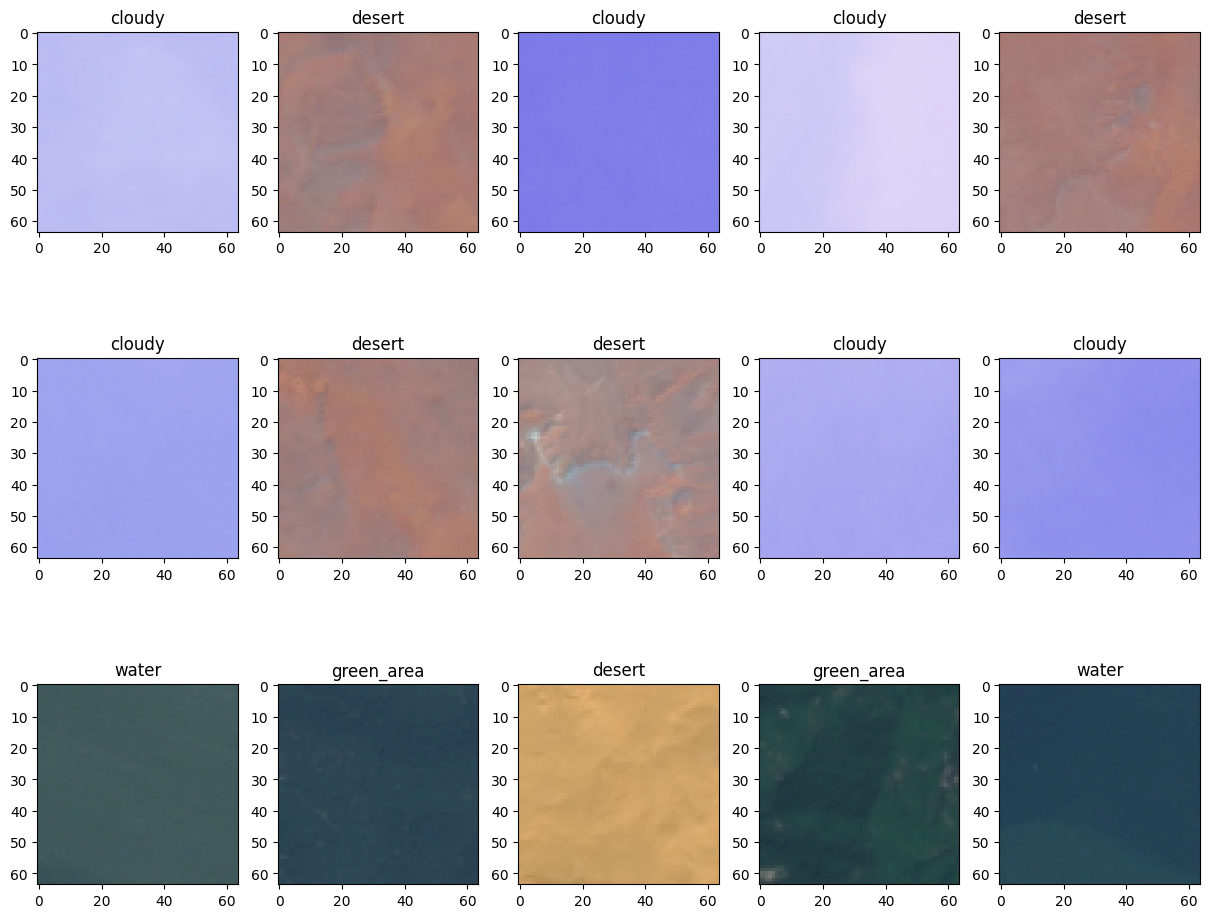

In [52]:
plt.figure(figsize = (15,12))
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(X_test[i])
    if y_pred[i] == 0:
        plt.title("cloudy")
    elif y_pred[i] == 1:
        plt.title("desert")
    elif y_pred[i] == 2:
        plt.title("green_area")
    elif y_pred[i] == 3:
        plt.title("water")

# Plot confusion matrix on a heatmap

<Axes: >

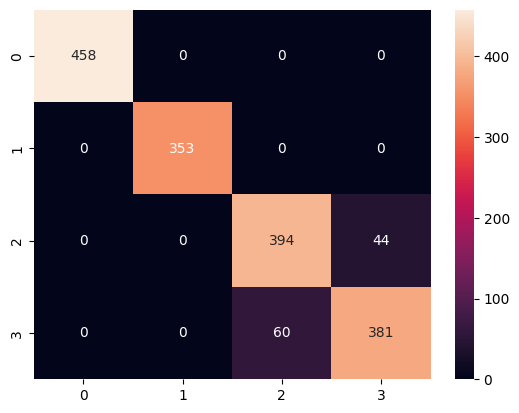

In [53]:

sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, fmt ='d')